# Prédiction du Diabète 


## Description du projet
Ce projet vise à prédire la probabilité qu'une personne soit atteinte de diabète en utilisant des dossiers médicaux. Le modèle est entraîné à partir de la base de données des Indiens Pima, qui contient plusieurs indicateurs médicaux tels que le nombre de grossesses, le taux de glucose, la pression artérielle, et d'autres facteurs. L'objectif est de construire un modèle de machine learning capable de classifier efficacement les patients en deux catégories : diabétique ou non-diabétique.

## Contexte
Le diabète, ou diabète sucré (Diabetes Mellitus - DM), est un groupe de troubles métaboliques caractérisé par un taux élevé de sucre dans le sang sur une longue période. Il existe principalement deux types de diabète :

- **Type 1** : Résultant de la destruction des cellules productrices d'insuline dans le pancréas, empêchant ainsi le corps de produire suffisamment d'insuline.
- **Type 2** : Associé à une résistance à l'insuline, où les cellules du corps ne répondent pas correctement à cette hormone.

La majorité des cas de diabète sont de type 2, représentant environ 90 % des cas. Selon des estimations de 2015, 415 millions de personnes dans le monde étaient atteintes de diabète, soit 8,3 % de la population adulte.


## Jeu de données
Le jeu de données utilisé pour ce projet provient de la base de données des Indiens Pima et contient les variables suivantes :

- **Nombre de grossesses (Pregnancies)**
- **Niveau de glucose (Glucose)**
- **Pression artérielle (BloodPressure)**
- **Épaisseur de la peau (SkinThickness)**
- **Insuline (Insulin)**
- **Indice de masse corporelle (IMC) (BMI)**
- **Fonction hérédité du diabète (DiabetesPedigreeFunction)**
- **Âge (Age)**


In [5]:
import pandas as pd

# Charger les données à partir d'un fichier CSV
url = "./data/diabetes.csv"
data = pd.read_csv(url)

# Visualiser les premières lignes du dataset
print(data.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

### Step 01  : Observations des données

À partir de l'analyse préliminaire des données, plusieurs observations importantes émergent :

1. **Valeurs de zéro :**
   - Dans la colonne **Insulin**, certaines lignes affichent un niveau d'insuline de 0. Cette valeur n'est pas physiologiquement plausible, car des niveaux d'insuline à zéro ne sont pas compatibles avec la biologie humaine normale.
   - De même, dans la colonne **SkinThickness**, on trouve également des valeurs de 0. Cela pourrait indiquer un manque de mesure ou une erreur de saisie, remettant en question la fiabilité des données.

2. **Mesures non pertinentes :**
   - Les zéros présents dans ces colonnes peuvent avoir un impact significatif sur le modèle de prédiction. En effet, ces valeurs pourraient être interprétées comme des données valides plutôt que comme des indicateurs de données manquantes. Cette mauvaise interprétation pourrait introduire des biais dans les résultats de prédiction, entraînant des conclusions erronées concernant la présence de diabète chez les patients.

Il est donc crucial de traiter ces valeurs avant de procéder à des analyses plus approfondies, afin d'assurer l'intégrité et la précision des résultats du modèle.


In [4]:
#Vérification des valeurs manquantes:
print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


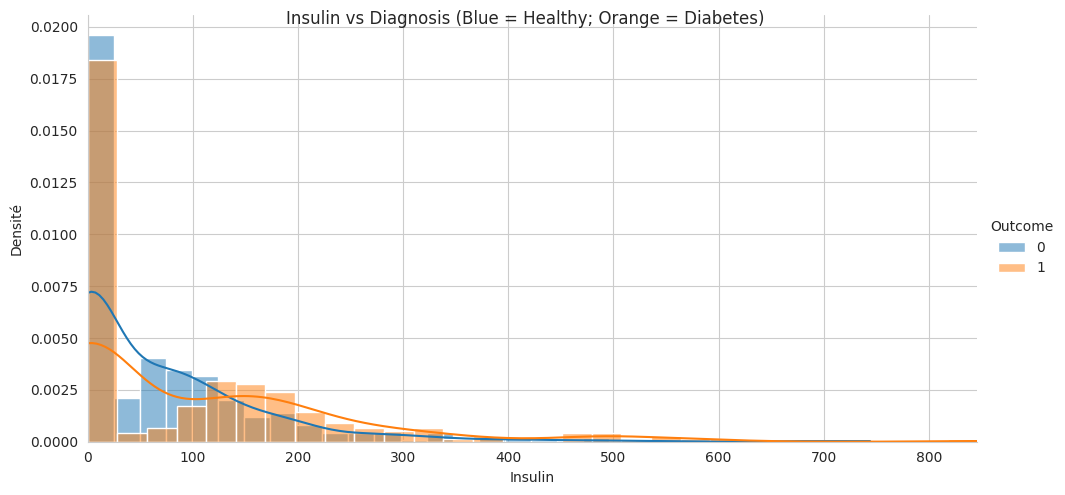

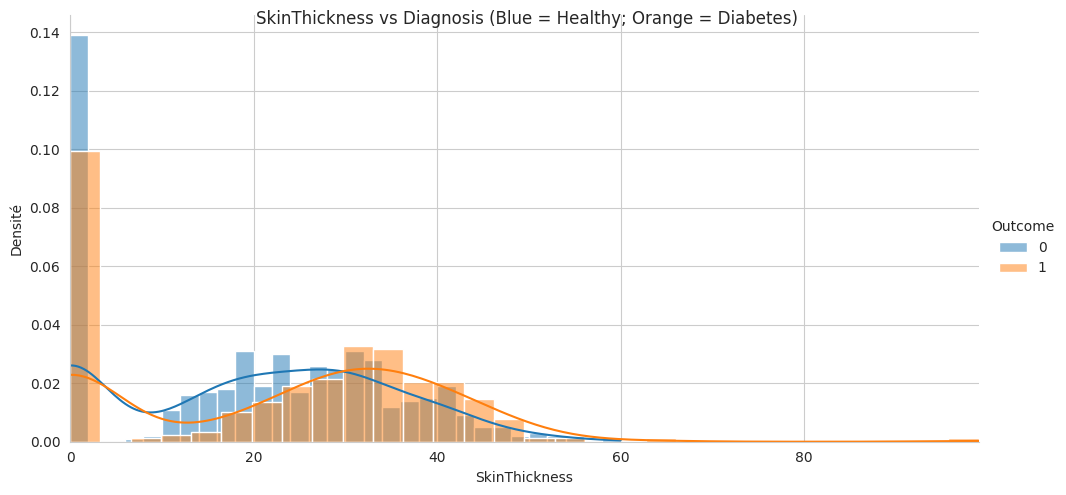

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram(values, label, feature, title):
    # Définir le style du graphique
    sns.set_style("whitegrid")

    # Créer un FacetGrid
    plot_one = sns.FacetGrid(values, hue=label, aspect=2, height=5)

    # Tracer l'histogramme
    plot_one.map(sns.histplot, feature, bins=30, stat="density", alpha=0.5, kde=True)

    # Définir les limites de l'axe x
    plot_one.set(xlim=(0, values[feature].max()))

    # Ajouter une légende
    plot_one.add_legend()

    # Définir les labels des axes
    plot_one.set_axis_labels(feature, 'Densité')

    # Ajouter un titre
    plot_one.fig.suptitle(title)

    # Afficher le graphique
    plt.show()

# Exemple d'utilisation
plot_histogram(data, "Outcome", 'Insulin', 'Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plot_histogram(data, "Outcome", 'SkinThickness', 'SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
